# Diagrama de fase del comportamiento de $\nu$ en función de $N$ para diferentes $\alpha$

Dado que la ecuación maestra reproduce de manera satisfactoria la distribución de probabilidad discreta en el estado estacionario $P_n$, que resulta de una larga evolución del sistema, haremos un análisis utilizando la ecuación maestra. En particular nos perderemos de mucha estadística que no está presente en el estado estacionario, pero nos permitirá obtener relaciones entre parámetros de interés.

## Dependencia de $P_0$ en función de $\nu$

Es de interés el valor de $P_0$ en el estado estacionario dado que es la probabilidad de que, dado que se observa el sistema, la población esté extinta. Dicho valor es el primer elemento del vector normalizado del núcleo de la matriz $\overline{\overline{M}}$ definida como

$$M_{i, j} = -\left[ -\alpha (N-i) + \nu i \frac{N-i}{N-1} \mu i \right]\delta_{i, j} + \left[ \alpha (N-i+1) + \nu (i-1)\frac{N-i+1}{N-1} \right] \delta_{i, j+1} + \mu (i+1) \delta_{i, j-1},$$

tal como se definió en el archivo `2-MasterEquation.ipynb`. En la librería `MasterEquation` ubicada en el directorio `librerías\MasterEquation.py` se encuentra implementada dicha diagonalización para hallar el espacio nulo y en particular $P_0(\nu)$ 

### Código

In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
from librerias.masterEquation import P0vsNu
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [103]:
# Parameters
N = 20
mu, alpha = 1, 0.01
nu_min, nu_max, N_nu = 0, 4, 1000
r = 0.5

In [104]:
# model
me = P0vsNu(N, nu_min, nu_max, N_nu, mu, alpha)
me.makeP0vsNu()
nuCar = me.getCaracteristicNu(r)
nuCar

1.2732732732732732

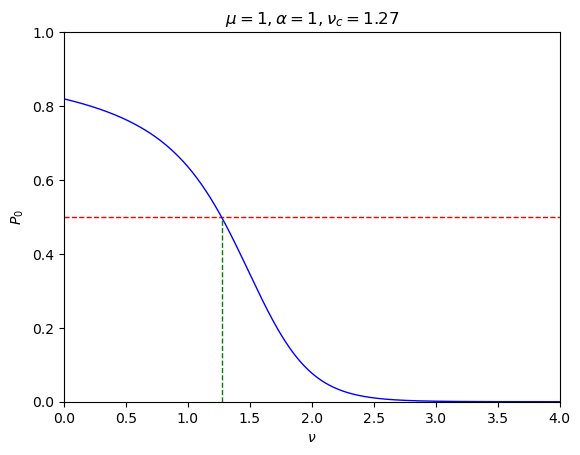

In [106]:
plt.hlines(0.5, nu_min, nu_max, color = "red", lw=1, linestyle="--")
plt.plot(me.getnuVector(), me.getP0Vector(), color = "blue", lw=1)
plt.vlines(nuCar, 0, r, color = "green", lw=1, linestyle="--")
plt.axis([0, nu_max, 0, 1])
plt.xlabel(r"$\nu$")
plt.ylabel(r"$P_0$")
plt.title(r"$\mu = 1, \alpha = 1, \nu_{c} = %.2f$"%nuCar)

plt.show()

## Dependecia de $P_0$ en función de $\nu$ y $N$, para $\alpha$ fijo.

De la misma manera que hicimos en la sección anterior, queremos ahora variar el valor de $N$ y mirar los perfiles que resultan.

### Código

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from librerias.masterEquation import P0vsNu
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [31]:
# fixed parameters
alphas = [0.01, 0.001, 0.0001]
mu = 1
N_min, N_max = 5, 100
nu_min, nu_max, N_nu = 0, 4, 1000
r = 0.5

In [32]:
# simulacion
total_data = []
for alpha in alphas:
    nuCars = np.zeros(N_max - N_min)
    P0s = np.zeros((N_max - N_min, N_nu))
    for i, N in enumerate(tqdm(range(N_min, N_max))):
        me = P0vsNu(N, nu_min, nu_max, N_nu, mu, alpha)
        me.makeP0vsNu()
        P0s[i] = me.getP0Vector()
        nuCar = me.getCaracteristicNu(r)
        nuCars[i] = nuCar
        del me
    total_data.append((P0s, nuCars))

100%|██████████| 95/95 [01:18<00:00,  1.21it/s]


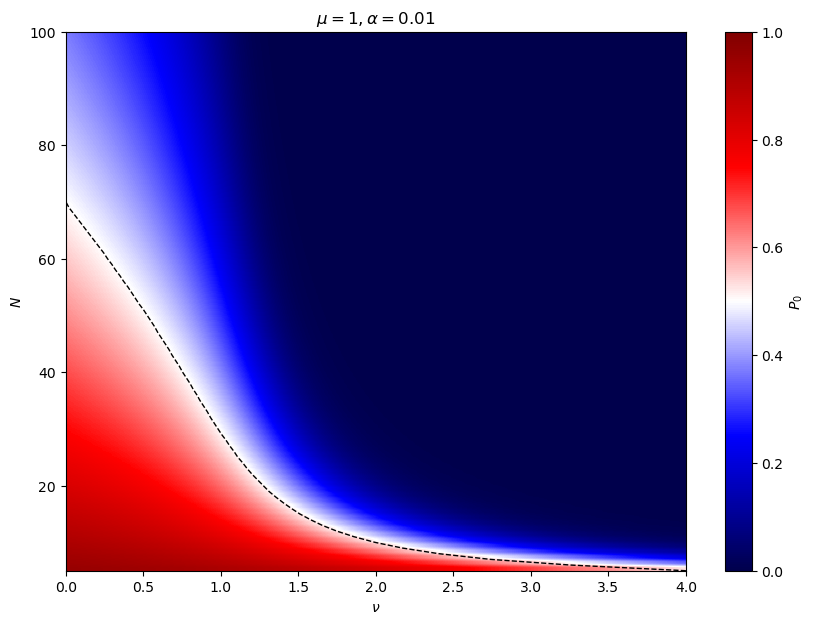

In [33]:
# plot the map
fig = plt.figure(figsize=(10, 7))

plt.imshow(total_data[0][0], aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="seismic", vmin=0, vmax=1)
plt.colorbar(label=r"$P_0$")
plt.plot(total_data[0][1], range(N_min, N_max), color="black", lw=1, linestyle="--")
plt.xlabel(r"$\nu$", )
plt.ylabel(r"$N$")
plt.title(r"$\mu = 1, \alpha = 0.01$")

plt.show()

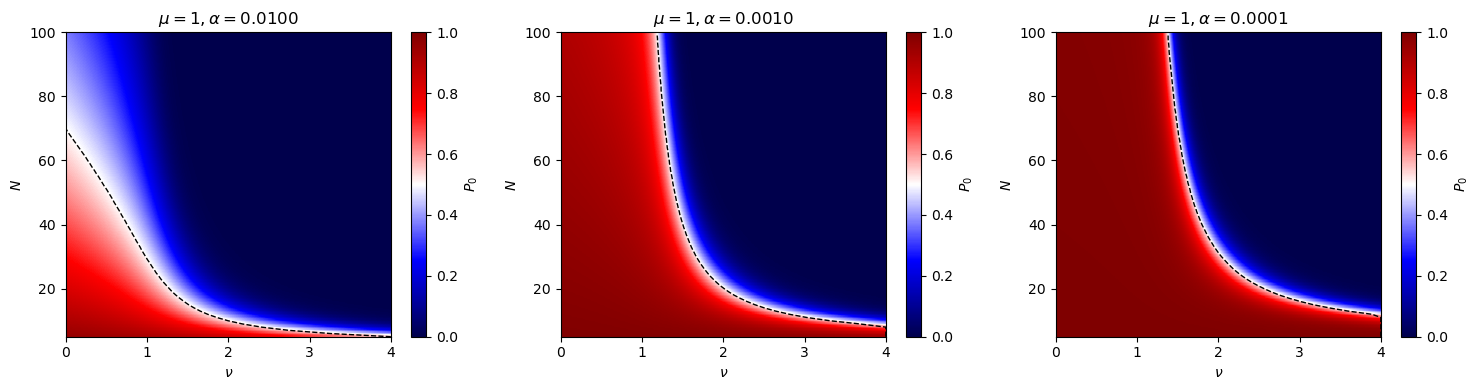

In [38]:
# plot the map
fig = plt.figure(figsize=(15, 4))
for i, (P0s, nuCars) in enumerate(total_data):
    plt.subplot(1, len(alphas), i+1)
    plt.imshow(P0s, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="seismic", vmin=0, vmax=1)
    plt.colorbar(label=r"$P_0$")
    plt.plot(nuCars, range(N_min, N_max), color="black", lw=1, linestyle="--")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

plt.tight_layout()

plt.show()

## Dependecia de $P_0$ en función de $\nu$ y $\alpha$, para $N$ fijo.

Vamos a proceder de la misma manera que antes, pero actualizar los valores de $\alpha$, esta vez para un $N = 20$.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from librerias.masterEquation import P0vsNu
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [39]:
# fixed parameters
Ns = [5, 10, 20, 50]
mu = 1

nu_min, nu_max, N_nu = 0, 4, 500
alpha_min, alpha_max, N_alpha = -10, -1, 1000    # alpha = 10**alpha
alphas = np.logspace(alpha_min, alpha_max, N_alpha)
r = 0.5

In [40]:
# Simulacion
total_data = []

for j, N in enumerate(Ns):
    nuCars = np.zeros(N_alpha)
    P0s = np.zeros((N_alpha, N_nu))

    for i, alpha in enumerate(tqdm(alphas)):
        me = P0vsNu(N, nu_min, nu_max, N_nu, mu, alpha)
        me.makeP0vsNu()
        P0s[i] = me.getP0Vector()
        nuCar = me.getCaracteristicNu(r)
        nuCars[i] = nuCar
        del me
        
    total_data.append((P0s, nuCars))

100%|██████████| 1000/1000 [07:08<00:00,  2.33it/s]


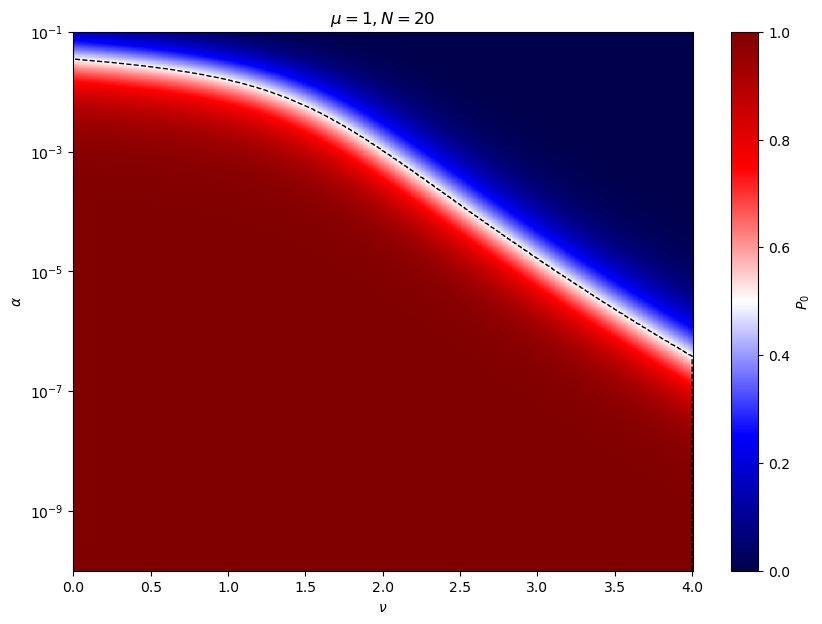

In [46]:
# plot the map
fig = plt.figure(figsize=(10, 7))

plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, total_data[2][0], cmap="seismic", vmin=0, vmax=1, shading='auto')
plt.colorbar(label=r"$P_0$")
plt.plot(total_data[2][1], alphas, color="black", lw=1, linestyle="--")
plt.yscale("log")
plt.xlabel(r"$\nu$", )
plt.ylabel(r"$\alpha$")
plt.title(r"$\mu = 1, N = 20$")

plt.show()

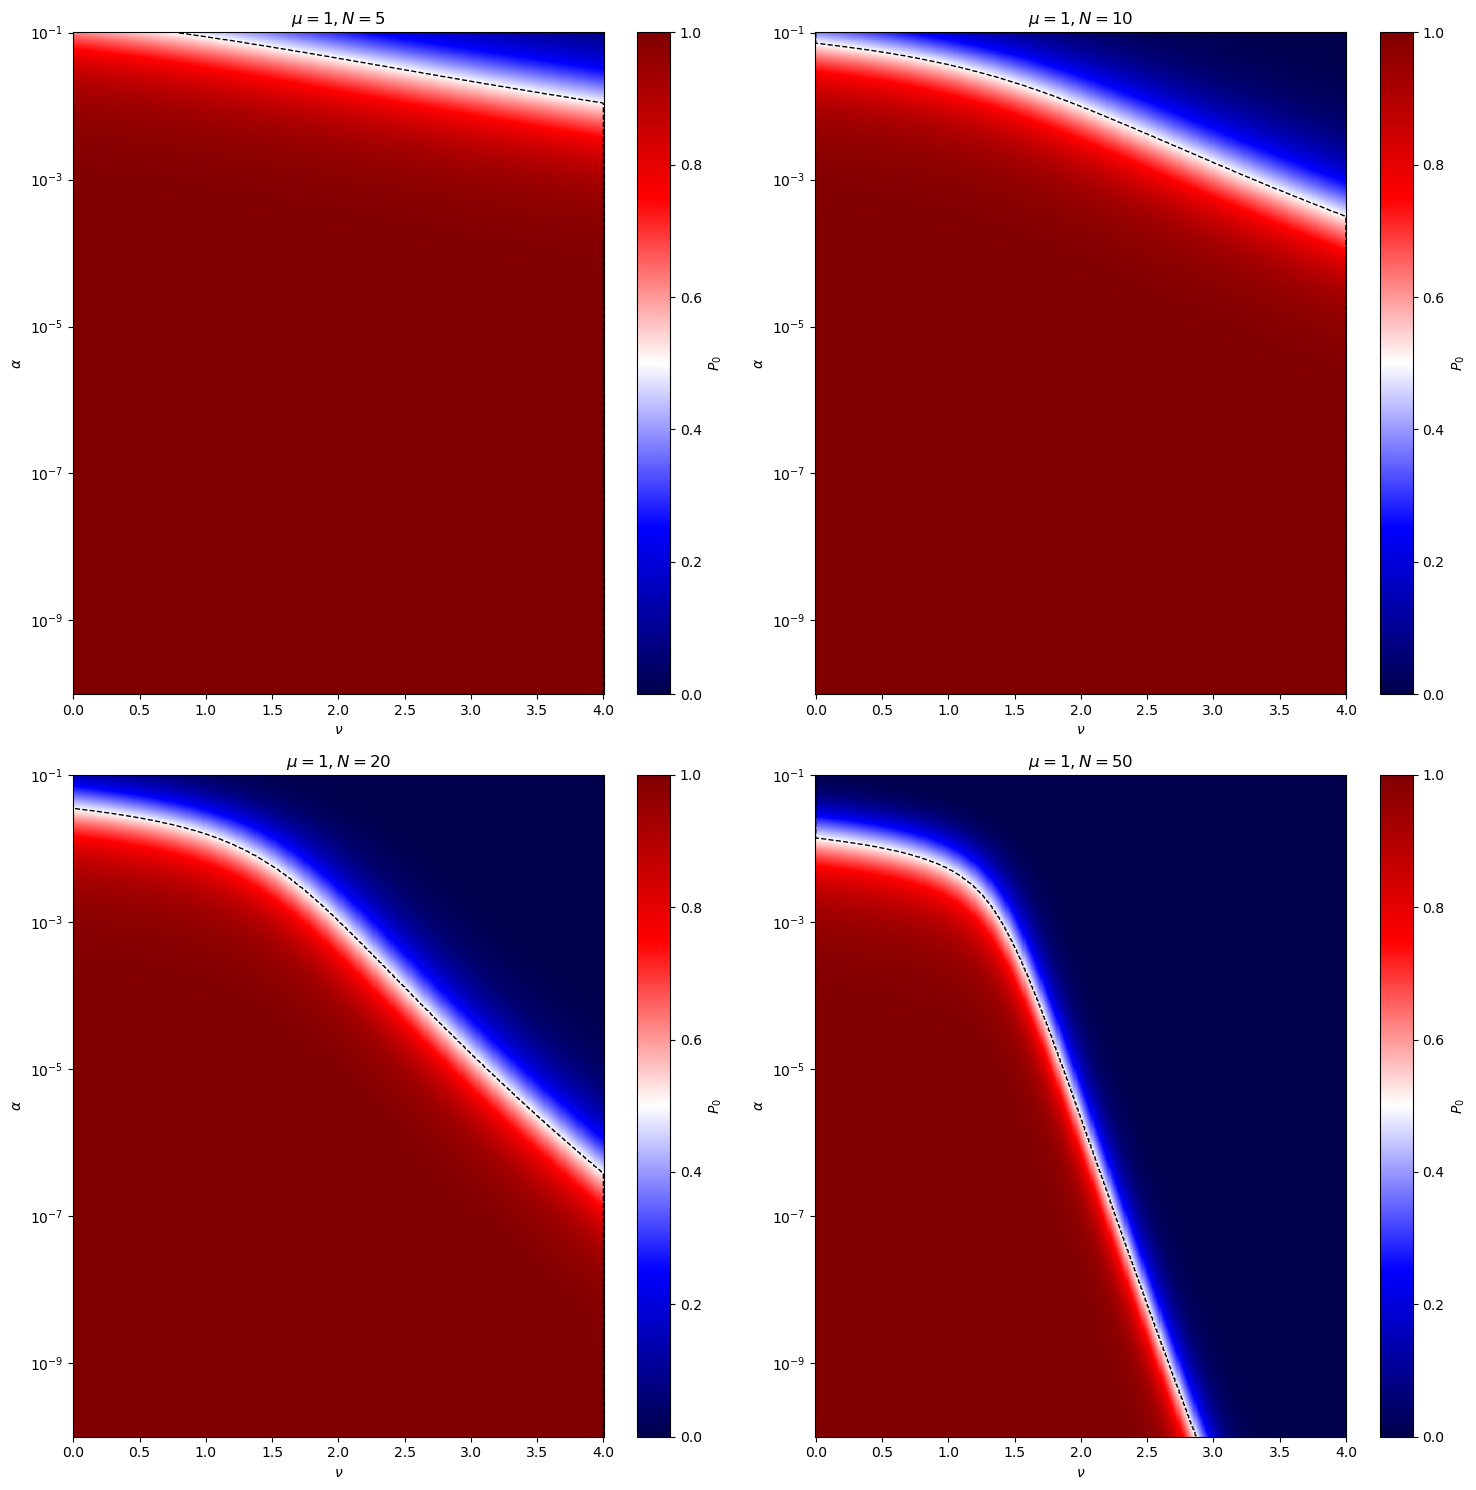

In [42]:
# plot the map
fig = plt.figure(figsize=(15, 15))
for i, (P0s, nuCars) in enumerate(total_data):
    plt.subplot(2, 2, i+1)
    plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, P0s, cmap="seismic", vmin=0, vmax=1, shading='auto')
    plt.colorbar(label=r"$P_0$")
    plt.plot(nuCars, alphas, color="black", lw=1, linestyle="--")
    plt.yscale("log")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.title(r"$\mu = 1, N = %d$"%Ns[i])

plt.tight_layout()

plt.show()